## Exercise 1: Data preparation

In order to use our package the spike data has to be packed in the following format: data is a numpy array of size `(num_trial,2)`, `dtype = np.ndarray`. Here `num_trial` is the number of trials, and for each trial the first column is the array of all of the ISIs (interspike intervals, `dtype=float`), and the second array contains the corresponding neuronal indeces (`dtype=int`). Neuronal indeces are integers staring from `0`. The first ISI is alawys equal to the time difference between trial start and the first spike time. If the trial end time is recorded, the last ISI will be the time difference between the last spike and the trial end time, while the corresponding index will be `-1`. 

Example: 

1st neuron (id=0) spike times: `0.12, 0.15, 0.25`.

2nd neuron (id=1) spike times: `0.05, 0.2`.

Trial 0 starts at `t=0`, and ends at `t=0.27`.

Then the data will look like this:

`data[0][0] = np.array([0.05,0.07,0.03,0.05,0.05,0.02])`

`data[0][1] = np.array([1,0,0,1,0,-1])`


While this format is convinient for optimization, it is not standart in the field. Another disadvantage is that it is harder to visulaise the spike trains of each neuron when using this format (since the spikes of all of the neurons are contained in a single array at each trial). In this task you will write a code that converts spike data from a more conventional format to our format. 

You will load 5 trials of data generated from a ramping dynamics that is stored in the following format: `data` is a dictionary with the following keys: `trial_end_time`, and `spikes`. The first key is a 1D array of length `num_trial` with the recorded trial end times (all trials start from `t=0`), where `N` is the number of trials. The second key is a numpy array of size `(num_trial,num_neuron)`, and each entry is a 1D array that contains spike times for a single neuron on each trial.

For the example above, the data in this format will be look like this: `data=[{"trial_end_time": np.array([0.27,]),"spikes": np.array([np.array([0.12, 0.15, 0.25]), np.array([0.05, 0.2])])`.

Write a code that converts spike data packed in this format into the format accepted by our package.

In [5]:
# Package installation - needed to run in google Collab. Skip this cell if you use local jupyter notebook
!pip install git+https://github.com/engellab/neuralflow

#Make data folder and download data files.
!mkdir data
import urllib.request
urllib.request.urlretrieve('https://github.com/engellab/neuralflow/raw/master/tutorials/CCN2021/data/Ex1.pkl', "data/Ex1.pkl")

In [6]:
# Import packages for part 1
import neuralflow
import numpy as np
import matplotlib.pyplot as plt, matplotlib.gridspec as gridspec
import scipy
import pickle

In [9]:
# First load the spike data
with open ("data/Ex1.pkl","rb") as fp:
    data_spikes = pickle.load(fp)

spikes = data_spikes['spikes']
trial_ends = data_spikes['trial_end_time']

# Calculate number of trials and number of neurons by using the shape of the spikes array
######INSERT YOUR CODE HERE############
num_trial = None
num_neuron = None
#######################################

# Allocate the data_ISI array that will have the desired format compatible with our package
data_ISI = np.empty((num_trial, 2), dtype=np.ndarray)

for i in range(num_trial):
    # spike_ind will contain all neural ids for a given trial. 
    spike_ind = []   
    for j in range(num_neuron):
        spike_ind = spike_ind + [j]*len(spikes[i,j])
    #Convert to numpy array
    spike_ind = np.array(spike_ind)
    
    # Now concatenate all spikes from all of the neurons on trial i into a single array.
    # Hint: you can subsribe all spikes from a trial k using spikes[k,:], and use np.concatenate function
    # to concatenate these into a single 1D array.
    
    ######INSERT YOUR CODE HERE############
    spike_trial = None
    #######################################
    
    # To create ISIs, we need to sort spike_trial array. Since we also need to permute spike_ind array 
    # based on this sorting, we need to find the indices that would sort spike_trial array (Hint: use np.argsort)
    
    ######INSERT YOUR CODE HERE############
    ind_sort = None
    #######################################
    
    # Apply in place sorting for both spike_trial and spike_ind arrays using ind_sort
    
    ######INSERT YOUR CODE HERE############
    spike_trial = None
    spike_ind = None
    #######################################
    
    # data_ISI[i,0] consists of the first ISI (between trial start time and the first spike), the rest of the ISIs,
    # and the last ISI between the last spike and end of trial. 
    
    data_ISI[i, 0] = np.concatenate(([spike_trial[0]],spike_trial[1:] - spike_trial[:-1],
                                     [trial_ends[i]-spike_trial[-1]]))
    
    # data_ISI[i,1] will contain spike_ind, and in the end it should have -1 to indicate the end of trial.
    # Use np.concatenate function to concatenate spike_ind array and an array that consists of a single element: -1.
    # Note that np.concatenate can concatenate arrays and lists, but it cannot concatenate arrays with a single 
    # number. Therefore, -1 should be converted into list or numpy array before it can be concatenated with spike_ind.
    
    ######INSERT YOUR CODE HERE##################
    data_ISI[i, 1] = None
    #############################################

TypeError: 'NoneType' object cannot be interpreted as an integer

In [3]:
# Now let us use our class method that does the same thing. This method, however, assumes that the
# spikes are 2D array of size (num_neuron,num_trial), so we need to transpose spikes before using it.
# See the docstring for energy_model_data_generation.transform_spikes_to_isi() for mode details

#Transpose spikes array
spikes_check = spikes.T

# Define time_epoch as a list of tuples, with length equal to the number of trials. 
# Each tuple consists of two elements: trial start time end trial end time.
time_epoch = [(0,te) for te in trial_ends]

# Initialize class instance
em=neuralflow.EnergyModel()

# Use docstring for the method below to learn more details
data_check=em.transform_spikes_to_isi(spikes_check,time_epoch,last_event_is_spike = False)

#Now calculate the difference between our data_ISI and the data_check and make sure the error is small
error=0
for i in range(num_trial):
    for j in range(num_neuron):
        error+=np.sum(np.abs(data_ISI[i][j]-data_check[i][j]))

if error<10**-8:
    print('Success! Please go to the next exercise!')
else:
    print('Something is wrong. Please modify your code before proceding!')


Success! Please go to the next exercise!


## Exercise 2: Generating spike data 

In this exercise you will generate latent trajectories and spike data from a ramping dynamics (linear potential function). 

First, you will initialize a class variable with desired parameters (potential, p0, D, firing rate functions), and visualize these parameters. Here you will have two neural responses with different firing rate functions. Then you will use our class method to generate the spike data and latent trajectories for each trial.

In [4]:
# Specify the parameters for EnergyModel class instance that will be used for data generation.
# See the docstring for neuralflow.EnergyModel() class.
# Here we use Spectral Elements Method (SEM) to solve the eigenvalue-eigenvector problem
# Our x-domain will consist of Ne elements with Np points per element, total number of grid points N = Ne*(Np-1)+1. 
# Nv is the number of retained eigenvectors/eigenvalues of the operator H, it affects the precision of
# the computation (must be less or equal to N-2). 
# 'peq_model' specifies the model of the potential function (ramping dynamics corresponds to a linear potential)
# D0 is the noise magnitude, p0_model specifies the model for initial probability distribution of the latent states,
# boundary mode specifies boundary conditions (absorbing/reflecting), 
# num_neuron is the number of neurons
# firing rate model specifies firing rate function for each neuron (list of dictionaries, one for each neuron).
# You are encouraged to inspect neuralflow.peq_models.py and neuralflow.firing_rate_models.py models to see
# the availible template models. 


EnergyModelParams={'pde_solve_param':{'method':{'name': 'SEM', 'gridsize': {'Np': 8, 'Ne': 64}}},  
               'Nv': 447,  
               'peq_model':{"model": "linear_pot", "params": {"slope": -2.65}},
               'D0': 0.56,
               'p0_model':{"model": "single_well", "params": {"miu": 200, "xmin": 0}},
               'boundary_mode':'absorbing', 
               'num_neuron':2,
               'firing_model':[{"model": "linear", "params": {"r_slope": 50, "r_bias": 60}},
                               {"model": "sinus", "params": {"bias": 50, "amp": 40}}],
               'verbose':True
               }

# Create the class instance for data generation (and call it em_gt, which means the ground-truth energymodel)
em_gt=neuralflow.EnergyModel(**EnergyModelParams)

Let us plot the model parametrs.  Once the class instance is created, the functions peq(x), p0(x), and f(x) will be calculated and stored in the class instance variable. The potential is represented by the variable `peq`, which is equal to `peq = C*exp(-Phi(x))`, where the constant `C` notmalizes peq so that the integral of peq over the latent space is 1. For details, see Supplementary Information for Genkin, Hughes, Engel aRxiV 2020 paper. If the class instance is called `em`, then the `peq` can be accessed by calling `em.peq_` (1D array of size `em.N`, where `em.N` is the total number of grid points), the latent domain (x-grid) can be accessed by calling `em.x_d_` (1D array of size `em.N`), the p0 distribution by calling `em.p0_` (1D array of size `em.N`), D - by calling `em.D_` (float), and firing rates for all neurons - by calling `em.fr_` (2D array of size `(em.N,num_neuron)`). 

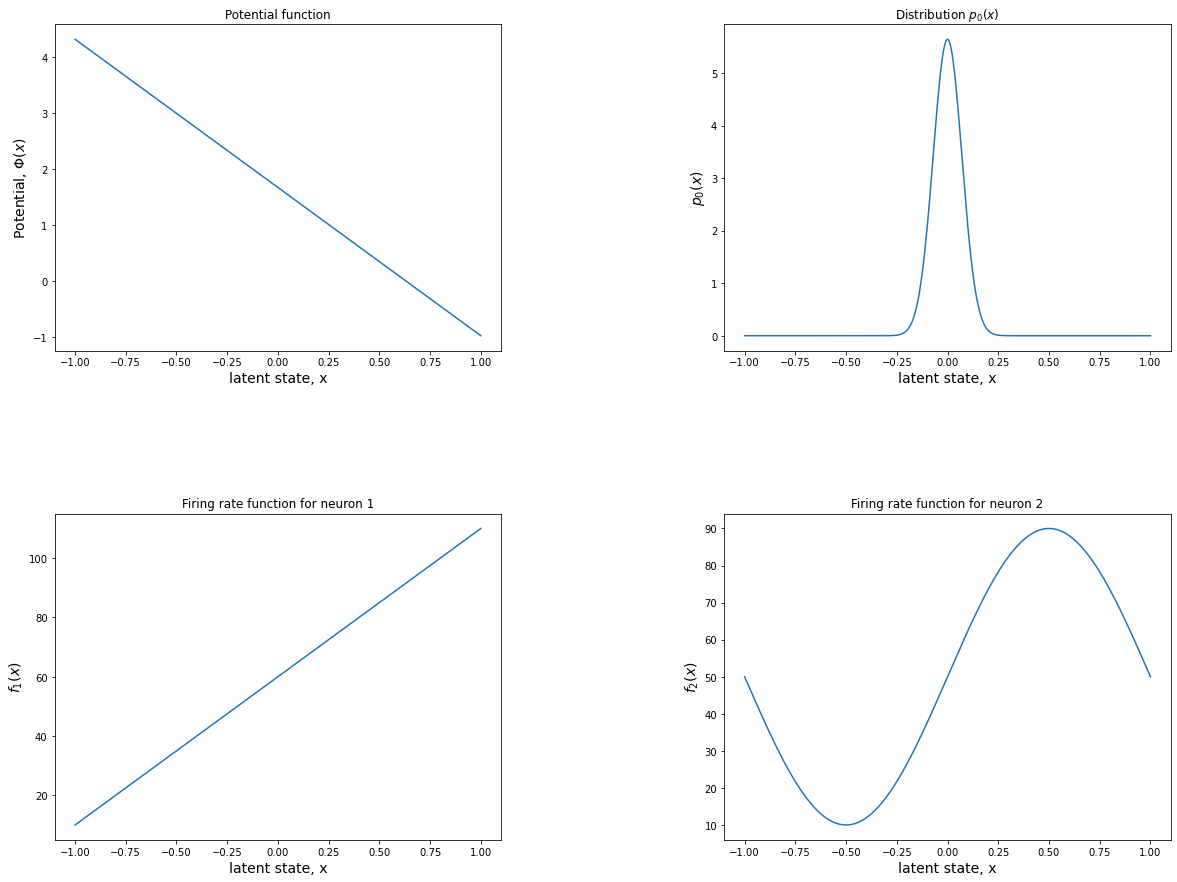

In [5]:
#Beginning of Ex2p1

fig=plt.figure(figsize=(20,15))
gs=gridspec.GridSpec(2,2,wspace=0.5,hspace=0.5);

ax = plt.subplot(gs[0])
ax.set_title('Potential function')
plt.xlabel('latent state, x', fontsize=14)
plt.ylabel(r'Potential, $\Phi(x)$', fontsize=14)

# Plot model potential, Phi(x)=-log(peq) versus latent domain grid x. 
# np.log function can be used to take the natural log
######INSERT YOUR CODE HERE##################
plt.plot(None,None)
#############################################

ax = plt.subplot(gs[1])
ax.set_title(r'Distribution $p_0(x)$')
plt.xlabel('latent state, x', fontsize=14)
plt.ylabel(r'$p_0(x)$', fontsize=14)

#Plot p0(x) versus x. 
######INSERT YOUR CODE HERE##################
plt.plot(None,None)
#############################################

ax = plt.subplot(gs[2])
ax.set_title('Firing rate function for neuron 1')
plt.xlabel('latent state, x', fontsize=14)
plt.ylabel(r'$f_1(x)$', fontsize=14)

#Plot the firing rate function for the first neuron versus x
######INSERT YOUR CODE HERE##################
plt.plot(None,None)
#############################################

ax = plt.subplot(gs[3])
ax.set_title('Firing rate function for neuron 2')
plt.xlabel('latent state, x', fontsize=14)
plt.ylabel(r'$f_2(x)$', fontsize=14)

#Plot the firing rate function for the second neuron versus x
######INSERT YOUR CODE HERE##################
plt.plot(None,None)
#############################################

Now, let us generate the spike data. See the doc string for generate_data method for more options.

In [6]:
# Specify data generation parameters
num_trial = 100
data_gen_params={'deltaT':0.0001, 'time_epoch':  [(0,100)]*num_trial, 'last_event_is_spike':False}

#Generate the data
data, time_bins, diff_traj, metadata=em_gt.generate_data(**data_gen_params)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:07<00:00, 13.29it/s]


## Exercise 3: Analysis and visualization of the generated data

In this exercise you will first find two trials with the longest and two trials with the shortest duration. For the selected 4 trials you will be asked to visualize: (i) latent trajectories, (ii) firing rates of the second neuron, (iii) spike rasters of the second neuron.

Then, you can visually inspect the spike raster and make sure that you observe a lot of spikes when the firing rate attins higher values, and you observe little number of spikes when the firing rate is low.


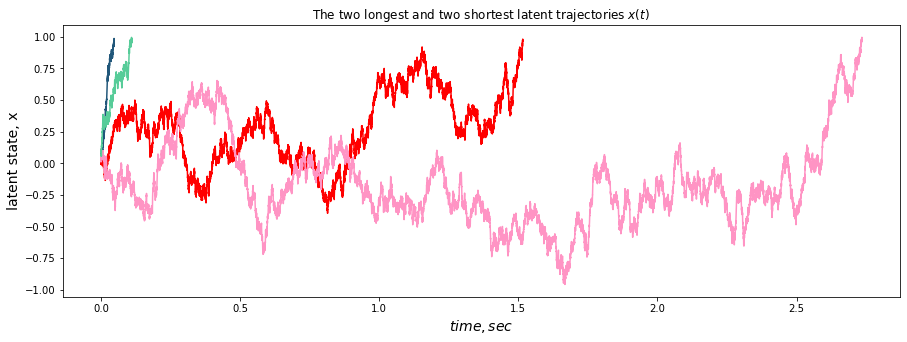

In [7]:
#Beginning of Ex2p2

# Find the indeces of 2 trajectories with the longest 2 trajectories with the shortest duration 
# The diffusion trajectories are stored in diff_traj array

# Find the duration of all trialls using time_bins list. For each trial, this list contains the array with all time
# points on which latent trajectory was recorded.

trial_duration = np.zeros(num_trial)
######INSERT YOUR CODE HERE##################
for i in range(num_trial):
    trial_duration[i] = None - None
#############################################

#Argsort the trial durations
ind_sort = np.argsort(trial_duration)

# Select 2 indeces of the trajectories with longest and shortest duration

######INSERT YOUR CODE HERE##################
ind_longest = None
ind_shortest = None
#############################################

# Let us plot the latent trajectories for the selected 4 trials.
color_set_1=[[1,0,0], [1, 0.58, 0.77], [0.77, 0, 0.77]]
color_set_2=[[0.13, 0.34, 0.48], [0.34, 0.8, 0.6], [0, 1, 0]]
fig=plt.figure(figsize=(15,5))

plt.title(r'The two longest and two shortest latent trajectories $x(t)$')
plt.ylabel('latent state, x', fontsize=14)
plt.xlabel(r'$time, sec$', fontsize=14)

for i in range(2):
    plt.plot(time_bins[ind_longest[i]],diff_traj[ind_longest[i]],color=color_set_1[i])
    plt.plot(time_bins[ind_shortest[i]],diff_traj[ind_shortest[i]],color=color_set_2[i])



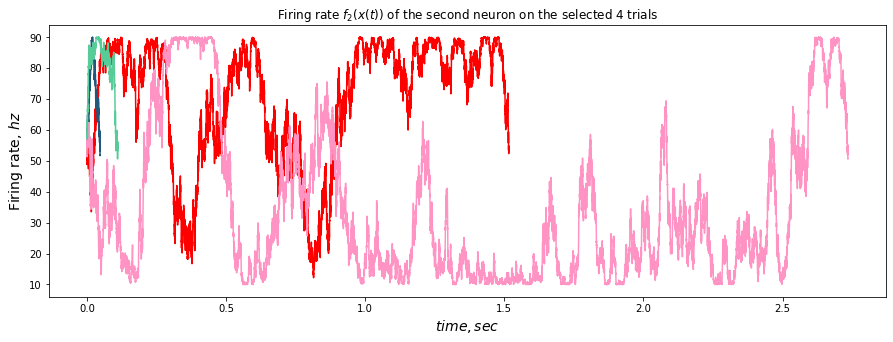

In [10]:
#Beginning of Ex2p3

# Now plot the firing rate f_2(x(t)) for the 2nd neuron on the selected trials. Note that the firing rate function
# for the second neuron is accessed by calling em_fitting.fr_[:,1] (as opposed to em_fitting.fr_[:,0] for the 
# 1st neuron)

# The firing rate function is defined only at the grid points. However, the generated latent trajectory can
# take arbitrary values in between the grid points. Thus, we need to interpolate this function 
# using scipy.interpolate.interp1d

######INSERT YOUR CODE HERE##################
fr_interpolate = scipy.interpolate.interp1d(None,None)
#############################################

# Now calculate firing rates f(x(t)) on the selected trials
fr_long_tr, fr_short_tr = np.empty((2,),dtype=np.ndarray), np.empty((2,),dtype=np.ndarray)

######INSERT YOUR CODE HERE##################
for i in range(2):
    fr_long_tr[i] = fr_interpolate(None)
    fr_short_tr[i] = fr_interpolate(None)
#############################################

#Now plot it
fig=plt.figure(figsize=(15,5))
plt.title(r'Firing rate $f_2(x(t))$ of the second neuron on the selected 4 trials')
plt.ylabel('Firing rate, $hz$', fontsize=14)
plt.xlabel(r'$time, sec$', fontsize=14)

for i in range(2):
    plt.plot(time_bins[ind_longest[i]],fr_long_tr[i],color=color_set_1[i])
    plt.plot(time_bins[ind_shortest[i]],fr_short_tr[i],color=color_set_2[i])




([<matplotlib.axis.YTick at 0x11e93f5e0>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

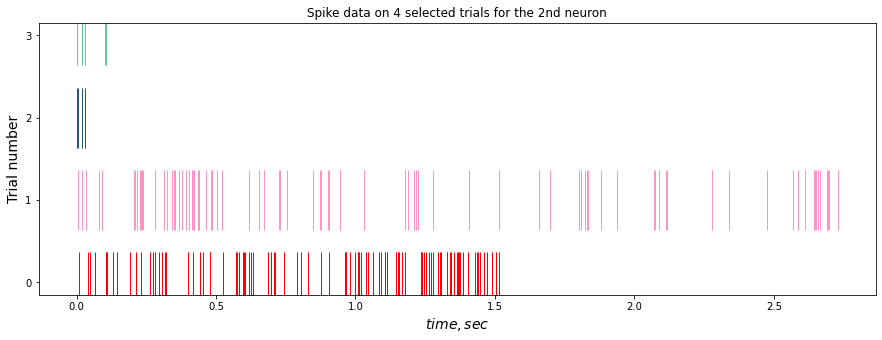

In [8]:
#Beginning of Ex2p4

# Now, let us plot spike rasters of the 2nd neurons on four selected trials.
# To do that, we first need to extract the spike times of this neuron

spikes_long_trial = np.empty((ind_longest.size,),dtype=np.ndarray)

#First, consider the longest trials
for i,trial in enumerate(ind_longest):
    ######INSERT YOUR CODE HERE##################
    # First, find spike times of all of the neurons at a given trial ind by taking a cumsum of data[trial][0]
    spikes_all = np.cumsum(None)
    #############################################
    
    # Now find the corresponding neural indices 
    nids = data[trial][1]
    
    # Now filter the spike times by index 1 (which corresponds to the 2nd neuron)
    spikes_long_trial[i] = spikes_all[nids==1]
    

#Do the same thing for the shortest trials
spikes_short_trial = np.empty((ind_shortest.size,),dtype=np.ndarray)

for i,trial in enumerate(ind_shortest):
    spikes_all = np.cumsum(data[trial][0])
    nids = data[trial][1]
    spikes_short_trial[i] = spikes_all[nids==1]



#Now visualize it
fig=plt.figure(figsize=(15,5))
plt.title('Spike data on 4 selected trials for the 2nd neuron')
plt.ylabel('Trial number', fontsize=14)
plt.xlabel(r'$time, sec$', fontsize=14)

for i in range(2):
    plt.plot(spikes_long_trial[i],i*np.ones(spikes_long_trial[i].size),'|',color=color_set_1[i],markersize=60)
    plt.plot(spikes_short_trial[i],(i+2)*np.ones(spikes_short_trial[i].size),'|',color=color_set_2[i],markersize=60)
plt.yticks([0,1,2,3])

## Putting it all together

Now, you can visually inspect the spike raster and make sure that you observe a lot of spikes when the firing rate attins higher values, and you observe little number of spikes when the firing rate is low.

([<matplotlib.axis.YTick at 0x1207f3370>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

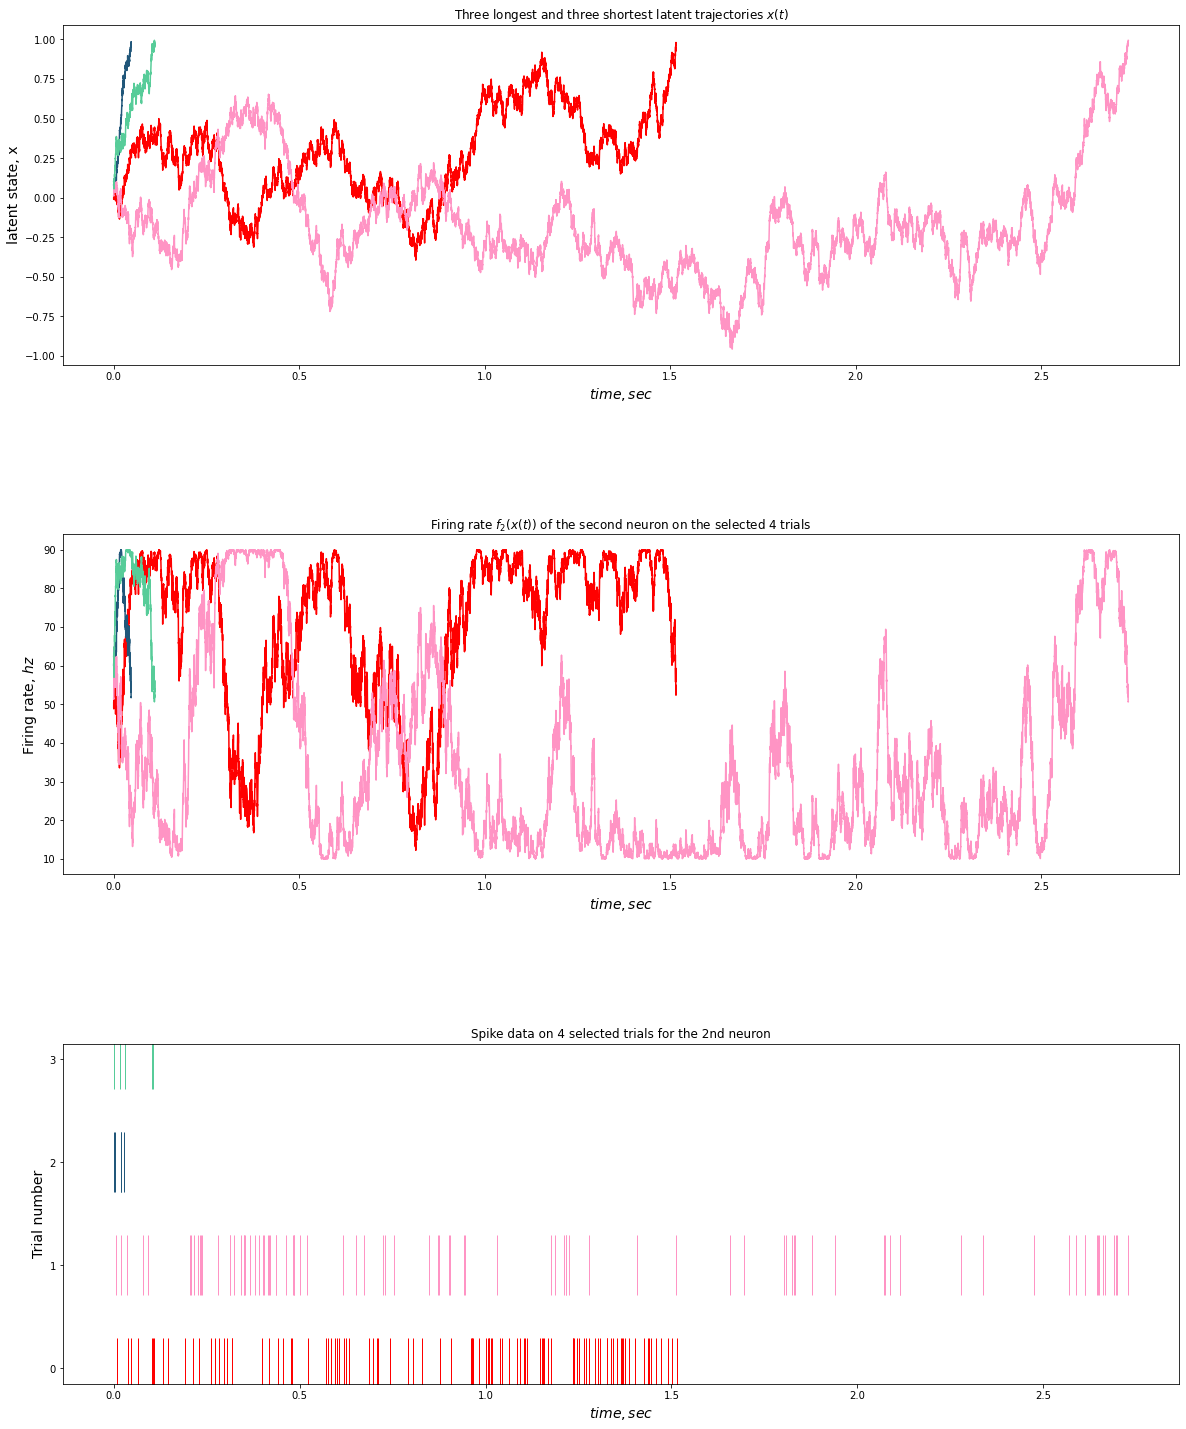

In [12]:
fig=plt.figure(figsize=(20,25))
gs=gridspec.GridSpec(3,1,wspace=0.5,hspace=0.5);

# Latent trajectories:
ax = plt.subplot(gs[0])
ax.set_title(r'Three longest and three shortest latent trajectories $x(t)$')
plt.ylabel('latent state, x', fontsize=14)
plt.xlabel(r'$time, sec$', fontsize=14)
for i in range(2):
    ax.plot(time_bins[ind_longest[i]],diff_traj[ind_longest[i]],color=color_set_1[i])
    ax.plot(time_bins[ind_shortest[i]],diff_traj[ind_shortest[i]],color=color_set_2[i])

    
# Firing rates of the second neuron
ax = plt.subplot(gs[1])
ax.set_title(r'Firing rate $f_2(x(t))$ of the second neuron on the selected 4 trials')
plt.ylabel('Firing rate, $hz$', fontsize=14)
plt.xlabel(r'$time, sec$', fontsize=14)

for i in range(2):
    ax.plot(time_bins[ind_longest[i]],fr_long_tr[i],color=color_set_1[i])
    ax.plot(time_bins[ind_shortest[i]],fr_short_tr[i],color=color_set_2[i])

# Spikes of the second neuron
ax = plt.subplot(gs[2])
ax.set_title(r'Spike data on 4 selected trials for the 2nd neuron')
plt.ylabel('Trial number', fontsize=14)
plt.xlabel(r'$time, sec$', fontsize=14)

for i in range(2):
    ax.plot(spikes_long_trial[i],i*np.ones(spikes_long_trial[i].size),'|',color=color_set_1[i],markersize=60)
    ax.plot(spikes_short_trial[i],(i+2)*np.ones(spikes_short_trial[i].size),'|',color=color_set_2[i],markersize=60)

plt.yticks([0,1,2,3])


